In [1]:
pip install ucimlrepo

Note: you may need to restart the kernel to use updated packages.


In [16]:
import numpy as np

In [2]:
from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

In [3]:
X

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [8]:
X.isnull().sum()

Alcohol                         0
Malicacid                       0
Ash                             0
Alcalinity_of_ash               0
Magnesium                       0
Total_phenols                   0
Flavanoids                      0
Nonflavanoid_phenols            0
Proanthocyanins                 0
Color_intensity                 0
Hue                             0
0D280_0D315_of_diluted_wines    0
Proline                         0
dtype: int64

In [9]:
from sklearn.preprocessing import StandardScaler

In [10]:
scaler=StandardScaler()

In [11]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3 , random_state=12)

In [12]:
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [13]:
from sklearn.decomposition import PCA

In [17]:
pca = PCA()
pca.fit(X_train_scaled)

explained_variance_ratio = pca.explained_variance_ratio_
cum_explained_variance = np.cumsum(explained_variance_ratio)
n = np.argmax(cum_explained_variance >= 0.95) + 1


pca = PCA(n_components=n)
X_train = pca.fit_transform(X_train_scaled)
X_test = pca.transform(X_test_scaled)

In [18]:
X_train

array([[-1.35893586e+00,  6.08053901e-01, -1.57601263e+00, ...,
        -1.62416701e-03, -3.51644587e-01,  1.53369425e-01],
       [-2.72276477e+00, -1.56323546e+00, -5.73865128e-01, ...,
         6.07039814e-01, -7.86729288e-01, -7.83468034e-02],
       [ 2.41737378e+00, -8.42666729e-01, -3.31904168e-02, ...,
         1.99298433e-01,  1.06194899e-01,  4.96511935e-01],
       ...,
       [ 2.41390539e+00,  1.03855164e-01, -9.23968679e-01, ...,
        -7.45215686e-01, -1.30910944e-01, -1.64418202e-01],
       [ 3.51880953e+00, -2.27238099e+00,  2.43265613e-01, ...,
         1.36252354e-01, -2.82747556e-01,  1.44716775e-01],
       [ 1.06562121e+00,  2.16938184e+00, -1.66238474e+00, ...,
        -4.53787963e-03, -3.09452249e-01,  8.91032902e-01]])

In [19]:
n

10

In [20]:
import matplotlib.pyplot as plt

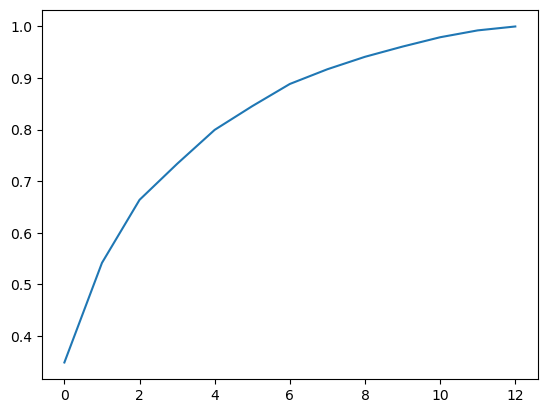

In [21]:
plt.plot(cum_explained_variance)